# ARBOLES DE DECISION EN DATOS DE SOBREVIVIENTES DEL TITANIC

In [209]:
#----------------------------------------------------------
# Se importan las librerias
#----------------------------------------------------------

import numpy as np
import pandas as pd
import sklearn
import warnings

## 1. Leer el archivo titanic.csv. Tenga en cuenta que los elementos del archivo están separados por ‘;’

In [210]:
#----------------------------------------------------------
# Url de los datos
#----------------------------------------------------------

url= ("https://raw.githubusercontent.com/MavelSterling/Informe_Inteligencia_Artificial/main/titanic.csv")

#----------------------------------------------------------
# Se cargan los datos
#----------------------------------------------------------
datos = pd.read_csv(url, sep=";")
datos

,survived,Name,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,"Braund, Mr. Owen Harris",3,male,22.0,1,0,7.2500,man,Southampton,no
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,71.2833,woman,Cherbourg,no
2,1,"Heikkinen, Miss. Laina",3,female,26.0,0,0,7.9250,woman,Southampton,yes
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,53.1000,woman,Southampton,no
4,0,"Allen, Mr. William Henry",3,male,35.0,0,0,8.0500,man,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",2,male,27.0,0,0,13.0000,man,Southampton,yes
887,1,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,30.0000,woman,Southampton,yes
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,23.4500,woman,Southampton,no
889,1,"Behr, Mr. Karl Howell",1,male,26.0,0,0,30.0000,man,Cherbourg,yes


In [211]:
#----------------------------------------------------------
# Información de la base de datos
#----------------------------------------------------------

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   Name         891 non-null    object 
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   who          891 non-null    object 
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## 2. Eliminar el atributo Name usando el comando datos.drop(["Name"], axis = 1, inplace = True)

In [212]:
#----------------------------------------------------------
# Eliminar el atributo Name
#----------------------------------------------------------

datos.drop(["Name"], axis = 1, inplace = True)

#----------------------------------------------------------
# Observar los datos sin el atributo Name
#----------------------------------------------------------
datos

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,no
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,no
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,no
4,0,3,male,35.0,0,0,8.0500,man,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,Southampton,yes
887,1,1,female,19.0,0,0,30.0000,woman,Southampton,yes
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,no
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,yes


In [213]:
#----------------------------------------------------------
# Información de las variables de la base de datos
#----------------------------------------------------------
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [214]:
#----------------------------------------------------------
# Variables categóricas (tipo object)
#----------------------------------------------------------
datos.select_dtypes(include=['object']).describe()

,sex,who,embark_town,alone
count,891,891,889,891
unique,2,3,3,2
top,male,man,Southampton,yes
freq,577,537,644,537


In [215]:
#----------------------------------------------------------
# Variables cuantitativas (tipo entero)
#----------------------------------------------------------
datos.select_dtypes(include=['int64']).describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


Se hace un resumen de las variables cuantitativas (tipo entero), para analizar la media, la desviación estándar, mínimo, 25%, 50% (mediana), 75% y el máximo

In [216]:
#----------------------------------------------------------
# Variables cuantitativas (tipo real)
#----------------------------------------------------------
datos.select_dtypes(include=['float64']).describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Se hace un resumen de las variables cuantitativas (tipo real), para analizar la media, la desviación estándar, mínimo, 25%, 50% (mediana), 75% y el máximo

## 3. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas

In [217]:
#----------------------------------------------------------
# Libreria sklearn
#----------------------------------------------------------
from sklearn.model_selection import train_test_split 

N=len(datos) # cantidad de datos
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain 

print(N,cTrain,cTest)# cantidad de: datos completos, datos entrenados, datos para probar

train_data,test_data= sklearn.model_selection.train_test_split(datos, train_size=cTrain, test_size=cTest)

891 712 179


891 es el número de observaciones en la base de datos

712 es el 80% de las observaciones de la base de datos que se van a utilizar para entrenar los datos

179 es el 20% de las observaciones de la base de datos que se van a utilizar para probar el modelo de predicción

In [218]:
#----------------------------------------------------------
# Dimensiones de los datos de entrenamiento
#----------------------------------------------------------
train_data.shape

(712, 10)

Los datos de entrenamientos son 712 observaciones y 10 variables



In [219]:
#----------------------------------------------------------
# Mostrar 5 filas de los datos de entrenamiento
#----------------------------------------------------------

train_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
748,0,1,male,19.0,1,0,53.100,man,Southampton,no
804,1,3,male,27.0,0,0,6.975,man,Southampton,yes
723,0,2,male,50.0,0,0,13.000,man,Southampton,yes
818,0,3,male,43.0,0,0,6.450,man,Southampton,yes
99,0,2,male,34.0,1,0,26.000,man,Southampton,no


De los 712 observaciones se muestran 5 datos con sus variables



In [220]:
#----------------------------------------------------------
# Estadísticas descriptivas datos de entrenamiento
#----------------------------------------------------------
train_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,568.000000,712.000000,712.000000,712.000000
mean,0.384831,2.321629,29.778468,0.498596,0.360955,31.702855
std,0.486897,0.832993,13.961051,1.083048,0.785088,48.485241
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.985400
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


Se hace un resumen de las variables cuantitativas de los datos de entrenamientos, para analizar la media, la desviación estándar, mínimo, 25%, 50% (mediana), 75% y el máximo.

## 4. Utilizar una estrategia para normalizar los datos


### Pipeline para los atributos categóricos

In [221]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 5 variables categoricas
cat_attribs = ['pclass','sex','who','embark_town','alone']

cat_pipeline = Pipeline([
("imputer", SimpleImputer(strategy="most_frequent")), 
("cat_encoder", OneHotEncoder(sparse=False))
])


### Pipeline para los atributos numéricos

In [222]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# Variables númericas

num_attribs = ['pclass','age', 'fare', 'sibsp', 'parch']
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())])

### Pipeline completo

In [223]:
#----------------------------------------------------------
#Libreria sklearn
#----------------------------------------------------------
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs), 
                                   ("cat", cat_pipeline, cat_attribs),])

In [224]:
#----------------------------------------------------------
# Se transforman los datos entrenados 
# Variables independientes
#----------------------------------------------------------

X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(712, 18)

In [225]:
X_train[0,:]

array([-1.58771819, -0.83489982,  0.44162278,  0.46328214, -0.46008685,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ])

In [226]:
#----------------------------------------------------------
# Variable dependiente -> survived
#----------------------------------------------------------

y_train = train_data["survived"]
y_train

748    0
804    1
723    0
818    0
99     0
      ..
348    1
701    1
730    1
853    1
130    0
Name: survived, Length: 712, dtype: int64

In [227]:
X_test = full_pipeline.transform(test_data) 
X_test

array([[ 0.81494993,  0.52738056, -0.65432574, ...,  1.        ,
         0.        ,  1.        ],
       [-0.38638413, -0.11369256, -0.38601443, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.81494993, -0.75476568, -0.45111501, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81494993, -0.9951681 , -0.5072705 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.38638413,  1.64925852, -0.11770311, ...,  1.        ,
         1.        ,  0.        ],
       [-0.38638413, -2.1971802 , -0.11770311, ...,  1.        ,
         1.        ,  0.        ]])

In [228]:
y_test = test_data["survived"]
y_test

179    0
17     1
876    0
12     0
607    1
      ..
78     1
407    1
433    0
259    1
340    1
Name: survived, Length: 179, dtype: int64

### 5. Configurar los hiperparámetros del árbol de decisión de la siguiente manera: criterion=gini, splitter=best, y random_state=123. Obtener 10 árboles de decisión que resultan de modificar el hiperparámetro max_depth desde 10 hasta 100 con incrementos de 10

In [229]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


scores=[]
scor=[]
decision_tree = []
accuracies = []
max_depths = range(10, 110, 10)

for max_depth in max_depths: 
    model_tree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=max_depth, random_state=123)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) # exactitud de cada árbol
    accuracies.append(accuracy)
    decision_tree.append(model_tree.score(X_test, y_test))
    scores = cross_val_score(model_tree, X_train, y_train, cv=5,scoring='accuracy') # validación cruzada con 5 particiones para cada árbol
    scor.append(scores.mean()) # promedio de los scores
    print("----------------------------------")
    print("Puntajes de la validación cruzada:")
    print(scores)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(scores.mean(),4))
    print("----------------------------------")
    #plt.figure(figsize=(15,10))
    #tree.plot_tree(model_tree, filled=True); # Se grafica cada árbol
    #plt.title(f"Árbol de decisión con max_depth={max_depth}") # título de los árboles
    

#----------------------------------------------------------   
# El índice del árbol con mayor exactitud
best_tree_index = np.argmax(scor)
#----------------------------------------------------------

#----------------------------------------------------------
# Se imprime los hiperparámetros del árbol con mayor precisión
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index])
print("criterion: gini")
print("splitter: best")
print("random_state: 123")


----------------------------------
Puntajes de la validación cruzada:
[0.75524476 0.76223776 0.70422535 0.82394366 0.79577465]
Promedio de los puntajes con max_depth=10 -> 0.7683
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.72027972 0.74125874 0.69014085 0.80985915 0.83098592]
Promedio de los puntajes con max_depth=20 -> 0.7585
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.72027972 0.74125874 0.69014085 0.80985915 0.83098592]
Promedio de los puntajes con max_depth=30 -> 0.7585
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.72027972 0.74125874 0.69014085 0.80985915 0.83098592]
Promedio de los puntajes con max_depth=40 -> 0.7585
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.72027972 0.74125874 0.69014085 0.80985915 0.83098592]
Promedio de los p

In [230]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=max_depths[best_tree_index], random_state=123)
best_tree.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred = best_tree.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto5 = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto5)

Matriz de confusión:
[[97 14]
 [24 44]]


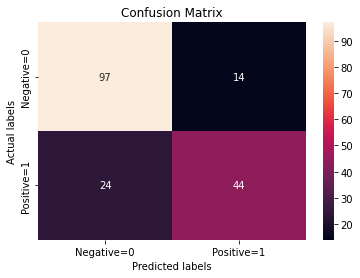

In [231]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

Representación gráfica de la matriz de confusión del punto 5.

### 6. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior

In [232]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos
accuracies_CV = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": scor})
display(accuracies_CV)


,max_depth,accuracy
0,10,0.768285
1,20,0.758505
2,30,0.758505
3,40,0.758505
4,50,0.758505
5,60,0.758505
6,70,0.758505
7,80,0.758505
8,90,0.758505
9,100,0.758505


Se obtiene una tabla de los 10 árboles construidos en el punto anterior (punto 5) junto con su accuracy.



### 7. Repita el mismo procedimiento del punto 5 usando como hiperparámetros criterion=entropy, splitter=best, y random_state=123. Compare los 10 valores obtenidos con los del punto 5

In [233]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores_2=[]
scor_2 =[]
decision_tree_2 = []
accuracies_p7= []
max_depths = range(10, 110, 10)

for max_depth in max_depths: 
    model_tree_2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depth, random_state=123)
    model_tree_2.fit(X_train, y_train)
    accuracy_7 = accuracy_score(y_test, y_pred) # exactitud de cada árbol
    accuracies_p7.append(accuracy_7)
    decision_tree_2.append(model_tree_2.score(X_test, y_test))
    scores_2 = cross_val_score(model_tree_2, X_train, y_train, cv=5,scoring='accuracy')
    scor_2.append(scores_2.mean()) # promedio de los scores

    
    print("----------------------------------")
    print("Puntajes de la validación cruzada:")
    print(scores_2)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(scores_2.mean(),4))
    print("----------------------------------")
   # plt.figure(figsize=(15,10))
   # tree.plot_tree(model_tree_2, filled=True); # Se grafica cada árbol
   # plt.title(f"Árbol de decisión con max_depth={max_depth}")



#----------------------------------------------------------   
# El índice del árbol con mayor exactitud
best_tree_index_2 = np.argmax(scor_2)
#----------------------------------------------------------

#----------------------------------------------------------
# Se imprime los hiperparámetros del árbol con mayor precisión
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index_2])
print("criterion: entropy")
print("splitter: best")
print("random_state: 123")

----------------------------------
Puntajes de la validación cruzada:
[0.76223776 0.79020979 0.76056338 0.84507042 0.81690141]
Promedio de los puntajes con max_depth=10 -> 0.795
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.74825175 0.74825175 0.72535211 0.82394366 0.80985915]
Promedio de los puntajes con max_depth=20 -> 0.7711
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.74125874 0.74825175 0.71830986 0.82394366 0.8028169 ]
Promedio de los puntajes con max_depth=30 -> 0.7669
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.74125874 0.74825175 0.71830986 0.82394366 0.8028169 ]
Promedio de los puntajes con max_depth=40 -> 0.7669
----------------------------------
----------------------------------
Puntajes de la validación cruzada:
[0.74125874 0.74825175 0.71830986 0.82394366 0.8028169 ]
Promedio de los pu

Se obtiene los 10 árboles construidos con los hiperparámetros: criterion=entropy, splitter=best,
y random_state=123.

In [234]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree_2 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=max_depths[best_tree_index_2], random_state=123)
best_tree_2.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred_2 = best_tree_2.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto7 = confusion_matrix(y_test, y_pred_2)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto7)

Matriz de confusión:
[[100  11]
 [ 26  42]]


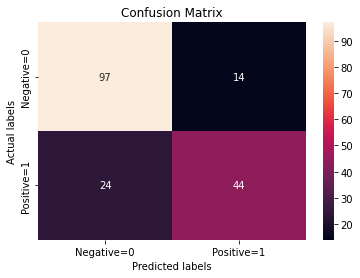

In [235]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

In [236]:

#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos 
accuracies_2 = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": scor_2})
display(accuracies_2)

,max_depth,accuracy
0,10,0.794997
1,20,0.771132
2,30,0.766916
3,40,0.766916
4,50,0.766916
5,60,0.766916
6,70,0.766916
7,80,0.766916
8,90,0.766916
9,100,0.766916


Representación gráfica de la matriz de confusión del punto 7.



In [239]:
#----------------------------------------------------------
# Comparar los resultados con el punto 5
#----------------------------------------------------------

#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

df_accuracy = pd.concat([accuracies_CV, accuracies_2], axis=1)

# Asignar nuevos nombres de columnas
df_accuracy.columns = ['max_depth', 'accuracy_p5', 'max_depth', 'accuracy_p7']

display(df_accuracy)


,max_depth,accuracy_p5,max_depth,accuracy_p7
0,10,0.768285,10,0.794997
1,20,0.758505,20,0.771132
2,30,0.758505,30,0.766916
3,40,0.758505,40,0.766916
4,50,0.758505,50,0.766916
5,60,0.758505,60,0.766916
6,70,0.758505,70,0.766916
7,80,0.758505,80,0.766916
8,90,0.758505,90,0.766916
9,100,0.758505,100,0.766916


En la tabla se presentan los valores de los accuracy obtenidos en los áboles que se construyeron en el punto 5 (accuracy_p5) y en el punto 7 (accuracy_p7), en el cual se observa que los accuracy de los árboles del punto 7 con el criterio 'entropy' se tienen valores más altos que los construidos en el punto 5 con el criterio 'gini'.


In [240]:
#----------------------------------------------------------
#Libreria numpy
#----------------------------------------------------------
import numpy as np


#----------------------------------------------------------
# Se define la matriz para los datos del punto 5
matrix_accuracies = np.array(accuracies_CV)
print("Datos del punto 5")
print("--------------------------")
# Se imprime la matriz
print(matrix_accuracies)

i = 1 #Se extrae accuracy de la matriz
accuracy_1 = matrix_accuracies[:,i]
print(accuracy_1)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 7
matrix_accuracies_2 = np.array(accuracies_2)
print("Datos del punto 7")
print("--------------------------")
# Se imprime la matriz
print(matrix_accuracies_2)

i = 1 #Se extrae accuracy de la matriz
accuracy_2 = matrix_accuracies_2[:,i]
print(accuracy_2)
print("--------------------------")


Datos del punto 5
--------------------------
[[ 10.           0.76828524]
 [ 20.           0.75850488]
 [ 30.           0.75850488]
 [ 40.           0.75850488]
 [ 50.           0.75850488]
 [ 60.           0.75850488]
 [ 70.           0.75850488]
 [ 80.           0.75850488]
 [ 90.           0.75850488]
 [100.           0.75850488]]
[0.76828524 0.75850488 0.75850488 0.75850488 0.75850488 0.75850488
 0.75850488 0.75850488 0.75850488 0.75850488]
--------------------------
Datos del punto 7
--------------------------
[[ 10.           0.79499655]
 [ 20.           0.77113169]
 [ 30.           0.76691618]
 [ 40.           0.76691618]
 [ 50.           0.76691618]
 [ 60.           0.76691618]
 [ 70.           0.76691618]
 [ 80.           0.76691618]
 [ 90.           0.76691618]
 [100.           0.76691618]]
[0.79499655 0.77113169 0.76691618 0.76691618 0.76691618 0.76691618
 0.76691618 0.76691618 0.76691618 0.76691618]
--------------------------


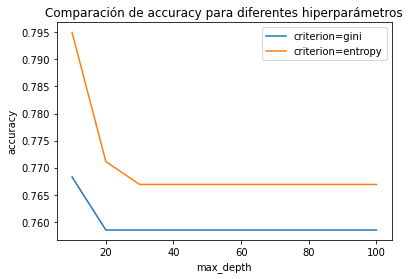

In [241]:
#----------------------------------------------------------
#Libreria matplotlib
#----------------------------------------------------------
import matplotlib.pyplot as plt


# Crea el gráfico de barras
plt.plot(max_depths, accuracy_1, label="criterion=gini")
plt.plot(max_depths, accuracy_2, label="criterion=entropy")


# Agrega etiquetas al eje x y y y un título al gráfico
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Comparación de accuracy para diferentes hiperparámetros")

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()





La figura anterior muestra la comparación gráfica de los accuracy según los criterio del punto 5 (gini) y el punto 7 (entropy).

### 8. Repita el mismo procedimiento del punto 5 usando como hiperparámetros criterion=entropy, splitter=random, y random_state=123.

In [242]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores_3 = []
scor_3=[]
decision_tree_3 = []

for max_depth in range(10, 110, 10): 
    model_tree_3 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=max_depth, random_state=123)
    model_tree_3.fit(X_train, y_train)
    decision_tree_3.append(model_tree_3.score(X_test, y_test))
    scores_3 = cross_val_score(model_tree_3, X_train, y_train, cv=5,scoring='accuracy') # validación cruzada
    scor_3.append(scores_3.mean()) # promedio de los scores

    print("---------------")
    print("Puntajes de la validación cruzada:")
    print(scores_3)
    print(f"Promedio de los puntajes con max_depth={max_depth}","->" ,round(scores_3.mean(),4))
    print("---------------")
    #plt.figure(figsize=(15,15))
    #tree.plot_tree(model_tree_3, filled=True);
    #plt.title(f"Árbol de decisión con max_depth={max_depth}")
    #tree.export_graphviz(decision_tree=model_tree_3, class_names=True,out_file="Arbol.dot")


best_tree_index_3 = np.argmax(scor_3)
print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index_3])
print("criterion: entropy")
print("splitter: random")
print("random_state: 123")

---------------
Puntajes de la validación cruzada:
[0.7972028  0.75524476 0.73239437 0.8028169  0.83802817]
Promedio de los puntajes con max_depth=10 -> 0.7851
---------------
---------------
Puntajes de la validación cruzada:
[0.81818182 0.76223776 0.73943662 0.76760563 0.80985915]
Promedio de los puntajes con max_depth=20 -> 0.7795
---------------
---------------
Puntajes de la validación cruzada:
[0.73426573 0.77622378 0.73943662 0.78873239 0.80985915]
Promedio de los puntajes con max_depth=30 -> 0.7697
---------------
---------------
Puntajes de la validación cruzada:
[0.73426573 0.77622378 0.73943662 0.78873239 0.80985915]
Promedio de los puntajes con max_depth=40 -> 0.7697
---------------
---------------
Puntajes de la validación cruzada:
[0.73426573 0.77622378 0.73943662 0.78873239 0.80985915]
Promedio de los puntajes con max_depth=50 -> 0.7697
---------------
---------------
Puntajes de la validación cruzada:
[0.73426573 0.77622378 0.73943662 0.78873239 0.80985915]
Promedio de 

In [243]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 10 arboles construidos 
accuracies_3 = pd.DataFrame({"max_depth": range(10, 110, 10), "accuracy": scor_3})
display(accuracies_3)

,max_depth,accuracy
0,10,0.785137
1,20,0.779464
2,30,0.769704
3,40,0.769704
4,50,0.769704
5,60,0.769704
6,70,0.769704
7,80,0.769704
8,90,0.769704
9,100,0.769704


In [244]:
#----------------------------------------------------------
#Librerias sklearn.metrics
#----------------------------------------------------------
from sklearn.metrics import confusion_matrix

# El árbol con la mayor precisión de la simulación
best_tree_3 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=max_depths[best_tree_index_3], random_state=123)
best_tree_3.fit(X_train, y_train)

# Se hace las predicciones para los datos de prueba
y_pred_3 = best_tree_3.predict(X_test)

# Calcular la matriz de confusión
confusion_Punto8 = confusion_matrix(y_test, y_pred_3)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_Punto8)

Matriz de confusión:
[[94 17]
 [22 46]]


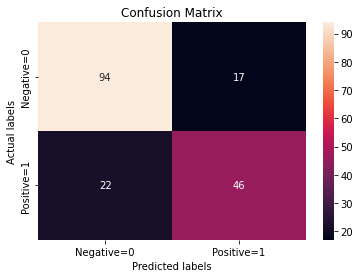

In [245]:
#----------------------------------------------------------
#Librerias matplotlib y seaborn
#----------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_Punto8, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();

Representación gráfica de la matriz de confusión del punto 8.


### 9. Indique en el notebook los hiperparámetros que por el momento le permiten obtener el árbol con mayor accuracy

In [246]:
#----------------------------------------------------------
# Comparar los resultados con el punto 5,7,8
#----------------------------------------------------------

#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd


df_accuracy_2 = pd.concat([accuracies_CV, accuracies_2, accuracies_3], axis=1)

# Asignar nuevos nombres de columnas
df_accuracy_2.columns = ['max_depth', 'accuracy_p5', 'max_depth', 'accuracy_p7', 
                         'max_depth', 'accuracy_p8']

display(df_accuracy_2)

,max_depth,accuracy_p5,max_depth,accuracy_p7,max_depth,accuracy_p8
0,10,0.768285,10,0.794997,10,0.785137
1,20,0.758505,20,0.771132,20,0.779464
2,30,0.758505,30,0.766916,30,0.769704
3,40,0.758505,40,0.766916,40,0.769704
4,50,0.758505,50,0.766916,50,0.769704
5,60,0.758505,60,0.766916,60,0.769704
6,70,0.758505,70,0.766916,70,0.769704
7,80,0.758505,80,0.766916,80,0.769704
8,90,0.758505,90,0.766916,90,0.769704
9,100,0.758505,100,0.766916,100,0.769704


En la tabla se presentan los valores de los accuracy obtenidos en los áboles que se construyeron en el punto 5 (accuracy_p5), el punto 7 (accuracy_p7) y el punto 8  (accuracy_p8), en el cual se observa que los accuracy de los árboles del punto 7 con el criterion=entropy y splitter=best se tienen valores más altos que los construidos en el punto 5, con el criterion=gini y  splitter=best, y los del punto 8 con criterion=entropy y splitter=random.

In [247]:
max_value_p5 = round(max(df_accuracy_2["accuracy_p5"]),4)
max_value_p7 = round(max(df_accuracy_2["accuracy_p7"]),4)
max_value_p8 = round(max(df_accuracy_2["accuracy_p8"]),4)


print("El ábrbol con mayor valor de accuracy en el punto 5:",max_value_p5)
print("El ábrbol con mayor valor de accuracy en el punto 7:",max_value_p7)
print("El ábrbol con mayor valor de accuracy en el punto 8:",max_value_p8)

print(" ")
max_accuracy =max([max_value_p5,max_value_p7, max_value_p8 ])
print("Mayor valor de accuracy", max_accuracy)

El ábrbol con mayor valor de accuracy en el punto 5: 0.7683
El ábrbol con mayor valor de accuracy en el punto 7: 0.795
El ábrbol con mayor valor de accuracy en el punto 8: 0.7851
 
Mayor valor de accuracy 0.795


In [248]:
best_tree_index_3 = np.argmax(scor_3)
print("Los hiperparámetros del árbol con mayor accuracy son:")
print("max_depth:", max_depths[best_tree_index_3])
print("criterion: entropy")
print("splitter: best")
print("random_state: 123")

Los hiperparámetros del árbol con mayor accuracy son:
max_depth: 10
criterion: entropy
splitter: best
random_state: 123


In [249]:
#----------------------------------------------------------
#Libreria numpy
#----------------------------------------------------------
import numpy as np


#----------------------------------------------------------
# Se define la matriz para los datos del punto 5
matrix_accuracies = np.array(accuracies_CV)
print("Datos del punto 5")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies)

i = 1 #Se extrae accuracy de la matriz
accuracy_1 = matrix_accuracies[:,i]
print(accuracy_1)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 7
matrix_accuracies_2 = np.array(accuracies_2)
print("Datos del punto 7")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies_2)

i = 1 #Se extrae accuracy de la matriz
accuracy_2 = matrix_accuracies_2[:,i]
print(accuracy_2)
print("--------------------------")

#----------------------------------------------------------

# Se define la matriz para los datos del punto 8
matrix_accuracies_3 = np.array(accuracies_3)
print("Datos del punto 8")
print("--------------------------")

# Se imprime la matriz
print(matrix_accuracies_3)

i = 1 #Se extrae accuracy de la matriz
accuracy_3 = matrix_accuracies_3[:,i]
print(accuracy_3)
print("--------------------------")


Datos del punto 5
--------------------------
[[ 10.           0.76828524]
 [ 20.           0.75850488]
 [ 30.           0.75850488]
 [ 40.           0.75850488]
 [ 50.           0.75850488]
 [ 60.           0.75850488]
 [ 70.           0.75850488]
 [ 80.           0.75850488]
 [ 90.           0.75850488]
 [100.           0.75850488]]
[0.76828524 0.75850488 0.75850488 0.75850488 0.75850488 0.75850488
 0.75850488 0.75850488 0.75850488 0.75850488]
--------------------------
Datos del punto 7
--------------------------
[[ 10.           0.79499655]
 [ 20.           0.77113169]
 [ 30.           0.76691618]
 [ 40.           0.76691618]
 [ 50.           0.76691618]
 [ 60.           0.76691618]
 [ 70.           0.76691618]
 [ 80.           0.76691618]
 [ 90.           0.76691618]
 [100.           0.76691618]]
[0.79499655 0.77113169 0.76691618 0.76691618 0.76691618 0.76691618
 0.76691618 0.76691618 0.76691618 0.76691618]
--------------------------
Datos del punto 8
--------------------------
[[ 

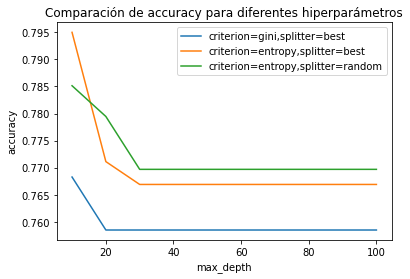

In [250]:
#----------------------------------------------------------
#Libreria matplotlib
#----------------------------------------------------------
import matplotlib.pyplot as plt


# Crea el gráfico de barras
plt.plot(max_depths, accuracy_1, label="criterion=gini,splitter=best")
plt.plot(max_depths, accuracy_2, label="criterion=entropy,splitter=best")
plt.plot(max_depths, accuracy_3, label="criterion=entropy,splitter=random")



# Agrega etiquetas al eje x y y y un título al gráfico
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Comparación de accuracy para diferentes hiperparámetros")

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

### 10. Seleccione uno de los hiperparámetros disponibles en la documentación (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) que sea diferente al criterion, splitter, max_depth, y random_state. Realice dos variaciones en el hiperparámetro seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el hiperparámetro seleccionado y analice si el árbol de decisión mejora, empeora, o mantiene su exactitud.

In [251]:
#----------------------------------------------------------
#Librerias sklearn.tree y sklearn.model_selection
#----------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Se selecciona el hiperparametro min_samples_split
accuracies_10=[]
scores_4 = []
scor_4=[]
decision_tree_4 = []

for min_sample_split in range(2, 6, 2): 
    model_tree_4 = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=10, random_state=123,
                                          min_samples_split=min_sample_split)
    model_tree_4.fit(X_train, y_train)
    decision_tree_4.append(model_tree_4.score(X_test, y_test))
    accuracy_10 = accuracy_score(y_test, y_pred) # exactitud de cada árbol
    accuracies_10.append(accuracy_10)
    scores_4 = cross_val_score(model_tree_4, X_train, y_train, cv=5,scoring='accuracy')
    scor_4 = scores_4.mean()
    print("---------------")
    print("Puntajes de la validación cruzada:")
    print(scores_4)
    print(f"Promedio de los puntajes con min_sample_split={min_sample_split}","->" ,round(scor_4,4))
    print("---------------")
    



best_tree_index_4 = np.argmax(scor_4)

print("Los hiperparámetros del árbol con mayor precisión son:")
print("max_depth:", max_depths[best_tree_index_4])
print("criterion: entropy")
print("splitter: best")
print("random_state: 123")


---------------
Puntajes de la validación cruzada:
[0.76223776 0.79020979 0.76056338 0.84507042 0.81690141]
Promedio de los puntajes con min_sample_split=2 -> 0.795
---------------
---------------
Puntajes de la validación cruzada:
[0.75524476 0.78321678 0.74647887 0.85915493 0.81690141]
Promedio de los puntajes con min_sample_split=4 -> 0.7922
---------------
Los hiperparámetros del árbol con mayor precisión son:
max_depth: 10
criterion: entropy
splitter: best
random_state: 123


Se crean las dos redes teniendo en cuenta los hiperparámetros del punto 9.


In [252]:
#----------------------------------------------------------
#Libreria pandas
#----------------------------------------------------------
import pandas as pd

# Mostrar el accuracy de los 2 arboles construidos 
accuracies_10_tree = pd.DataFrame({"min_sample_split": range(2, 6, 2), "accuracy": decision_tree_4})
display(accuracies_10_tree)


,min_sample_split,accuracy
0,2,0.793296
1,4,0.787709


In [258]:
#----------------------------------------------------------
# Comparar los resultados 
#----------------------------------------------------------

max_value_p10 = round(max(accuracies_10_tree["accuracy"]),4)

if max_accuracy > max_value_p10:
    print("La red neuronal empeoró la exactitud, por lo que la mejor red tiene un accuracy de", max_accuracy,
          "que corresponde al punto 9.\nMientras la nueva red tiene un accuracy de",max_value_p10 )
    
elif max_accuracy < max_value_p10:
    print("La red neuronal mejoró la exactitud, por lo que la mejor red tiene un accuracy de", max_value_p10, 
          "que corresponde al punto 10.\nMientras la red del punto anterior tiene un accuracy de",max_accuracy )
  
else:
    print("La red neuronal mantuvo la exactitud, ya que los valores de accuracy dieron igual aunque se haya realizado variaciones en los hiperparámetros.")




La red neuronal empeoró la exactitud, por lo que la mejor red tiene un accuracy de 0.795 que corresponde al punto 9.
Mientras la nueva red tiene un accuracy de 0.7933
